<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Grid-Staggering Elastic 2D</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is a private extension writen by Yajian Gao based on part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Yajian Gao

This exercise covers the following aspects:

* Solving velocity-stress formulation of 2D wave equation with finite difference method
* Understanding the grid-staggering in connection with finite difference solution to the elastic wave equation
---

### Exercise
First understand the codes below and run the simulation. 

Then, improve the result using (4-point operator) for 1st derivative.

**Message: Once you become familiar with all the codes below you can go to the Cell tab on the toolbar and click Run All.**


In [1]:
# Configuration step (Please run it before the simulation code!)
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
from matplotlib import cm


In [2]:
# Initialization of parameters

# Simple finite difference solver
# Elastic wave equation
# 2-D regular staggered grid

# Basic parameters
nt = 10000                                       # number of time steps
nx = 1000                                             # number of grid points in x
nz = 1000
                                              # velocity (m/sec) (compression wave)
vp=np.zeros((nx,nz))+3000
vs=np.zeros((nx,nz))+2000
rho0=5000
irz=np.array([500])
irx=np.array([600])

dx=1000                                          #m
dz=1000





isnap = 3                                              # snapshot frequency
isx = round(nx/2)                                     # source location
isz = round(nz/2) 


#####stable criterion
f0 =  np.max(5000)/dx/30
eps = 0.3
dt=eps*dx/np.max(7000)


###In order to ensure stability of the simulation, the temporal spacing must satisfy the Courant-
#Friedrichs-Levy (CFL) stability criterion (Courant et al., 1967).
dt_stable=dx/(7/6)/np.sqrt(2)/np.max(7000)###from 
print('f0=',f0)
print('dt=',dt)
print('dt_stable=',dt_stable)


nop = 30                                                # number of operator either 2 or 4


x = (np.arange(nx)*dx)                                 # initialize space coordinates 
z = (np.arange(nz)*dz)
                                     # calculate time step from stability criterion(s)



# Source time function
t = (np.arange(nt) * dt)                             # initialize time axis
T0 = 1. / f0                                           # period
a = 4. / T0                                            # half-width (so called sigma)
t0 = T0 / dt

src = np.zeros(nt) 
tmp = np.zeros(round(nt/10))
for it in range(0,round(nt/10)):
    t = (it - t0) * dt
    tmp[it] = -2 * a * t * np.exp(-(a * t) ** 2) 
    # derivative of Gaussian (so called sigma)
    
    
tmp1 = np.zeros(round(nt/10))
for it in range(0,round(nt/10)):
    t = (it - t0) * dt
    tmp1[it] = -2 * a * t * np.exp(-(a * t) ** 2)       # derivative of Gaussian (so called sigma)

    
tmp2 = np.zeros(round(nt/10))
for it in range(0,round(nt/10)):
    t = (it - t0) * dt
    tmp2[it] = -2 * a * t * np.exp(-(a * t) ** 2)       # derivative of Gaussian (so called sigma)

    
    
tmp3 = np.zeros(round(nt/10))
for it in range(0,round(nt/10)):
    t = (it - t0) * dt
    tmp3[it] = -2 * a * t * np.exp(-(a * t) ** 2)       # derivative of Gaussian (so called sigma)

    
    
    
    
src[0:len(tmp)] = tmp
src[len(tmp)+1:len(tmp)+1+len(tmp1)] = tmp1
src[2*len(tmp)+1:2*len(tmp)+1+len(tmp2)] = tmp2
src[3*len(tmp)+1:3*len(tmp)+1+len(tmp3)] = tmp3
src[4*len(tmp)+1:4*len(tmp)+1+len(tmp3)] = tmp3
src[5*len(tmp)+1:5*len(tmp)+1+len(tmp3)] = tmp3
src[6*len(tmp)+1:6*len(tmp)+1+len(tmp3)] = tmp3
src[7*len(tmp)+1:7*len(tmp)+1+len(tmp3)] = tmp3
                                    # so
lam = np.max(vp) * T0                                          # wavelength


#####source term in space
mxx=1e6/dx/dz
mzz=1e6/dx/dz






f0= 0.16666666666666666
dt= 0.04285714285714286
dt_stable= 0.08658450381876091


<IPython.core.display.Javascript object>


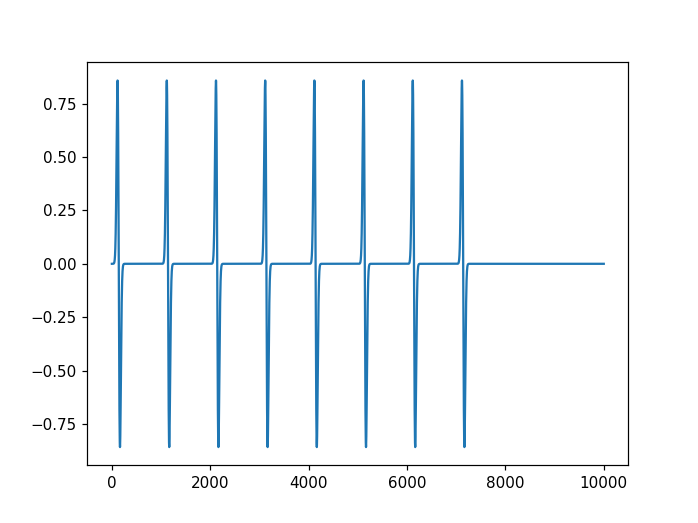

In [3]:
plt.plot(src)
plt.show()

In [4]:
######## just for fun and love, in order to plot a wavefield simulating in a heart, set the vp and vs 1/10 smaller 
######## than the vp and vs in the heart, but please be careful of the dispersion effect
for i in np.arange(isx-200,isx+200):
    #print(i-isx)
    for j in np.arange(isz,nz):
        #print(100*np.sqrt(2*np.abs((i-isx)/100)-((i-isx)/100)**2))
        if j<100*np.sqrt(2*np.abs((i-isx)/100)-((i-isx)/100)**2)+isz:
              vp[i][j]=7000
              vs[i][j]=5000
                
#50*(-2.14)*np.sqrt(np.sqrt(2)-np.sqrt(np.abs(x_heart/50)))
for i in np.arange(isx-200,isx+200):
    #print(i-isx)
    for j in np.arange(0,isz):
        #print(np.sqrt(np.sqrt(2)-np.sqrt(np.abs(i-isx/100))))
        if j> 100*(-2.14)*(np.sqrt(np.sqrt(2)-np.sqrt(np.abs((i-isx)/100))))+isz:
              vp[i][j]=7000
              vs[i][j]=5000


<IPython.core.display.Javascript object>


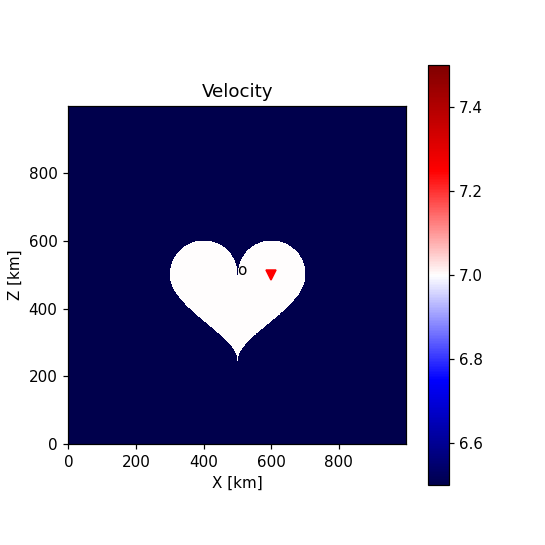

In [5]:
fig = plt.figure(figsize=(5,5))
image = plt.imshow(vp.T/1000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=6500/1000, vmax=7500/1000)
plt.colorbar()
plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.gca().invert_yaxis()

for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vr',)
plt.text(isx, isz, 'o')
plt.ion()
plt.show(block=False)

In [6]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range(ni1,ni2):
        for j in range(nk1, nk2):
            dsxx =  9/8*(sxx[i+1][j]-sxx[i][j])/(dx)-1/24*(sxx[i+2][j]-sxx[i-1][j])/(dx)
            dszx = 9/8*(szx[i][j]-szx[i-1][j])/(dz)-1/24*(szx[i+1][j]-szx[i-2][j])/(dx)
            dszz = 9/8*(szz[i][j+1]-szz[i][j])/(dz)-1/24*(szz[i][j+2]-szz[i][j-1])/(dx)
            dsxz = 9/8*(sxz[i][j]-sxz[i][j-1])/(dx)-1/24*(sxz[i][j+1]-sxz[i][j-2])/(dx)
            vx_new=(dsxx+dsxz)
            vz_new=(dszz+dszx)
            vx[i,j]=vx[i][j]+dt*(vx_new/rho[i,j]) 
            vz[i,j]=vz[i][j]+dt*(vz_new/rho[i,j])
    return vx,vz



<IPython.core.display.Javascript object>


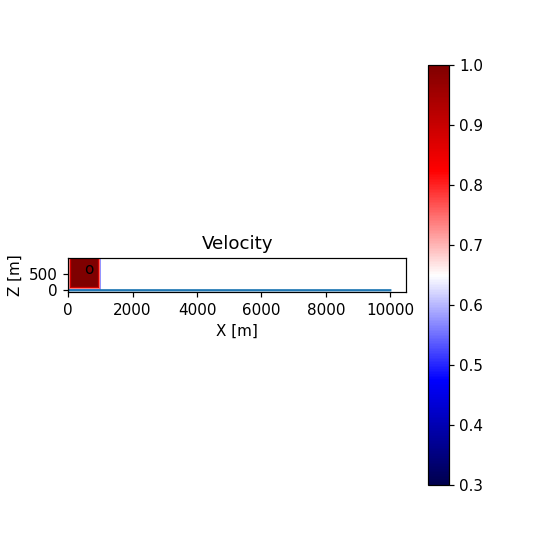

In [7]:

def generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,absorb_thickness_n):
    #absorbpoint_x=np.arange(ni1,ni1+absorb_thickness_n-1)
    damp=np.ones((nx,nz))
    ####left boundary
    for i in range(ni1,ni2):
        for j in range(0,absorb_thickness_n):
            #print()
            damp[i,j]=(np.exp(-(0.007*(ni1+absorb_thickness_n-j))**2))
            
            
    #lower boundary
    for i in range(nk1,absorb_thickness_n):
        for j in range(0,nk2):
            #print()
            damp[i,j]=(np.exp(-(0.007*(nk1+absorb_thickness_n-i))**2))
            #print(j,damp[i,j])   
    # right boundary       
    for i in range(ni2-absorb_thickness_n,ni2):
        for j in range(0,nz):
            #print()
            damp[i,j]=(np.exp(-(0.007*(ni2-absorb_thickness_n-i))**2))
            #print(j,damp[i,j])    
    # left lower corner 
    for j in range(0,nk1+absorb_thickness_n):
        damp[j:ni1+absorb_thickness_n,j]=(np.exp(-(0.007*(nk1+absorb_thickness_n-j))**2))
                
    # right lower corner
    for j in range(0,nk1+absorb_thickness_n):
        damp[ni2-absorb_thickness_n:ni2-j,j]=(np.exp(-(0.007*(nk1+absorb_thickness_n-j))**2))   
    
            
    return damp


stencil=2
ni1=stencil+1
ni2=nx-stencil
nk1=stencil+1
nk2=nz-stencil
damp=generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,120)
fig = plt.figure(figsize=(5,5))
image = plt.imshow(damp.T, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=0.3, vmax=1)
plt.colorbar()
plt.title('Velocity')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
plt.ion()
plt.show(block=False)    
    
    
    
    
    

In [88]:
damp

array([[ 0.47648406,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.47648406,  0.48223873,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.47648406,  0.48223873,  0.48801507, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 0.47648406,  0.49962923,  0.49962923, ...,  0.49962923,
         0.49962923,  0.49962923],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [8]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range (ni1, ni2):
        for j in range(nk1, nk2-1):
            ezx=9/8*(vz[i+1,j]-vz[i,j])/dx-1/24*(vz[i+2][j]-vz[i-1][j])/dx
            exz=9/8*(vx[i,j+1]-vx[i,j])/dz-1/24*(vx[i][j+2]-vx[i][j-1])/dz
            exx=9/8*(vx[i,j]-vx[i-1,j])/dx-1/24*(vx[i+1,j]-vx[i-2,j])/dx
            ezz=9/8*(vz[i,j]-vz[i,j-1])/dz-1/24*(vz[i,j+1]-vz[i,j-2])/dz
            #hTxx=(lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz
            #hTzz=(lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx
            #hTxz=(mu[i,j])*ezx+(mu[i,j])*exz
            sxx[i,j]=sxx[i,j]+((lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz)*dt
            sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
            szz[i,j]=szz[i,j]+((lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx)*dt
            szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        ### free surface
        sxx[:,nk2]=sxx[:,nk2]+((lamd[:,nk2]+2*mu[:,nk2])*exx-(lamd[:,nk2]**2/(lamd[:,nk2]+2*mu[:,nk2])*exx))*dt
            #sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        szz[:,nk2]=szz[:,nk2]
            #szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt                
    return sxx,sxz,szz,szx

In [9]:

import datetime

######here you could input a heterogenity vp and vs

def assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx,isz,src,damp):
    t1 = datetime.datetime.now() 
    rho=np.zeros((nx,nz))+rho0
    mu = np.zeros((nx,nz))+rho*vs**2
    lamd=np.zeros((nx,nz))+rho*vp**2-2*mu
    ##### initial the cycle
    vx = np.zeros((nx, nz))
    vz = np.zeros((nx, nz))
    sxx = np.zeros((nx, nz)) 
    sxz = np.zeros((nx, nz))
    szz = np.zeros((nx, nz))
    szx=np.zeros((nx, nz))
    seis = np.zeros((len(irx), nt))
    print(np.shape(seis))
    ir = np.arange(len(irx))
    v = max([np.abs(src.min()), np.abs(src.max())])
    stencil=2
    ni1=stencil+1
    ni2=nx-stencil
    nk1=stencil+1
    nk2=nz-stencil
    fig = plt.figure(figsize=(8,8))
    #plt.plot(x[isx-200:isx+202]/1000,100*np.sqrt(2*np.abs((x[isx-200:isx+202]/1000-isx)/100)\
                                               #  -((x[isx-200:isx+202]/1000-isx)/100)**2)+isz,'r')
    #plt.plot(x[isx-200:isx+202]/1000,100*(-2.14)*(np.sqrt(np.sqrt(2)-\
                                                     #     np.sqrt(np.abs((x[isx-200:isx+202]/1000-isx)\
                                                    #                     /100))))+isz,'r')
    #extent = [np.min(),np.max(X),np.min(X),np.max(Y)]
    image = plt.imshow(vz.T, animated=True, cmap=cm.PiYG, interpolation='nearest', vmin=-1e-3, vmax=1e-3)
    #image = plt.imshow(vp.T/100000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=-0.001, vmax=0.001)
    plt.colorbar()
    plt.title('Wavefield vy')
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')
    plt.gca().invert_yaxis()
    plt.text(isx, isz, 'o')
    plt.ion()
    plt.show(block=False)
    #### free surface by image
    #plt.text(isx, isz, 'o')
    for i in range(len(irx)):
        plt.plot(irx[i], irz[i], 'vk')
    #fig.canvas.draw()
    m=0
    for it in np.arange (nt):
        szz[:,nk2]=0
        #for n in range(0,stencil-1):
        #    szz[:,nk2+1+n]=-szz[:,nk2-1-n]
         #   sxz[:,nk2+n]=-sxz[:,nk2-n-1]
        vx, vz = update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        vx=vx*damp
        vz=vz*damp
        vz[:,nk2  :nz]  = 0.0;
        vx[:,nk2+1:nz]  = 0.0;
        vz[isx,isz-70]=vz[isx,isz-70]+src[it] 
        vx[isx,isz]=vx[isx,isz]
        ###for the receivers
        for k in np.arange(len(irx)):
            print(vz[int(irx[k]),int(irz[k])])
            seis[k,it]=seis[k,it]+vz[int(irx[k]),int(irz[k])]
        sxx,sxz,szz,szx = update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        #sxx=sxx*damp
        #sxz=sxz*damp
        #szz=szz*damp
        #szx=szx*damp
        if (it % isnap) == 0:
            #print(np.shape(vz))
            image.set_data(vz.T)
            m=m+1
            plt.plot
            plt.savefig(str(m)+'.ps')
            fig.canvas.draw()
    t2 = datetime.datetime.now()   
    print(t2-t1)
    return vx, vz,seis








In [10]:
plt.plot(src)
plt.show()

(1, 10000)


<IPython.core.display.Javascript object>


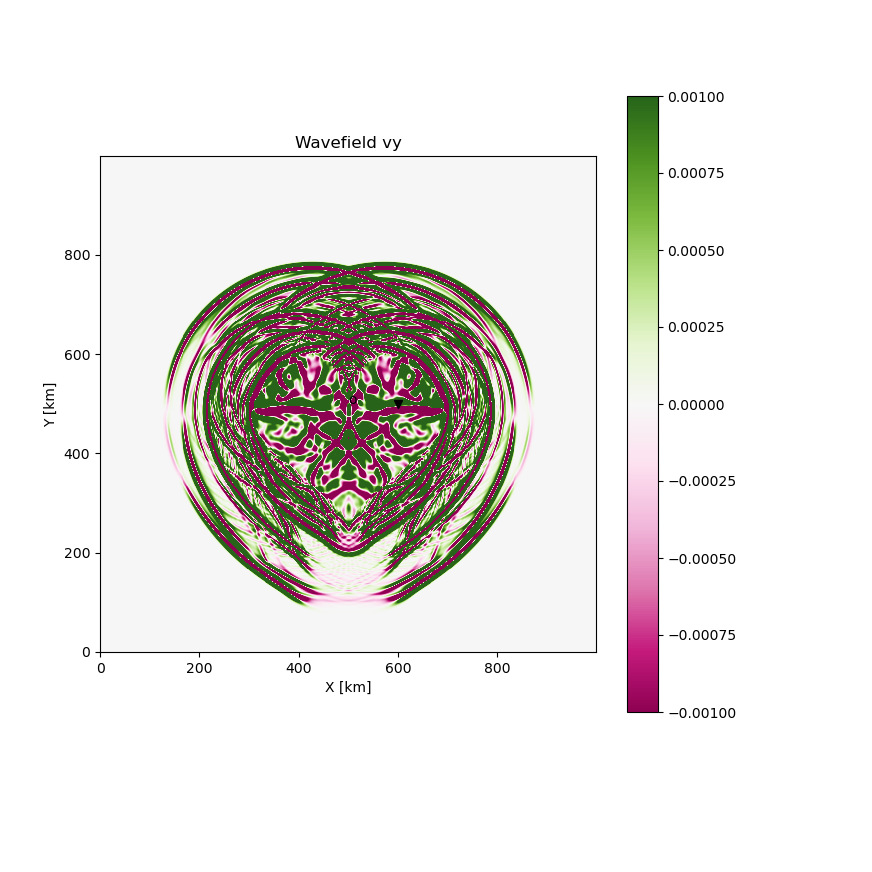

/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-6-bd1a54ddf490>", line 2:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
^

  state.func_ir.loc))


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1415791673886566e-199
-4.725809310701891e-195
6.459755996146616e-191
-3.7891564069417606e-187
1.1593729893701058e-183
-2.092171906034777e-180
2.4182694858981605e-177
-1.9010656810827155e-174
1.0634029467547368e-171
-4.3838435722139544e-169
1.3695660524575153e-166
-3.316387126704897e-164
6.34005626005798e-162
-9.714866496973674e-160
1.2081055092102505e-157
-1.2317566204620235e-155
1.0381637185474696e-153
-7.279659815231915e-152
4.2666435579345625e-150
-2.096223685205004e-148
8.640590847757606e-147
-2.9835059727103764e-145
8.587955337669531e-144
-2.040740988695585e-142
3.930696124134634e-141
-5.920352379979227e-140
6.416465165993948e-139
-3.700419630477447e-138
-1.895415562447133e-137
6.630766799353286e-136
-5.910114118161372e-135
-2.322372860948182e-135
5.5

2.0263788336373246e-09
4.757238316636397e-09
8.186833728384874e-09
1.2229217421230654e-08
1.676797165956304e-08
2.169517331641678e-08
2.696001598623712e-08
3.2618544693876244e-08
3.887431874688924e-08
4.6100594675578464e-08
5.4838076337870897e-08
6.576795353441498e-08
7.96666541371308e-08
9.735476529276505e-08
1.1965614090440932e-07
1.4738294309840802e-07
1.813578218752948e-07
2.2247637709053366e-07
2.7180337827471074e-07
3.3068757920260976e-07
4.008750116420154e-07
4.84601229685127e-07
5.84649476832149e-07
7.043727664778812e-07
8.476904765773092e-07
1.019080566706517e-06
1.2235935639771354e-06
1.4669121016747524e-06
1.7554702858148595e-06
2.0966330580452576e-06
2.4989212197397362e-06
2.9722574909953985e-06
3.528206429894885e-06
4.180187437314771e-06
4.943653741972826e-06
5.836247011513806e-06
6.877951626251259e-06
8.091279754191354e-06
9.501515468683304e-06
1.1137033804423574e-05
1.3029692639319093e-05
1.521527748406611e-05
1.7733967657787836e-05
2.06307909690039e-05
2.395604348953520

0.004615353296863
0.0044872732740744445
0.0043565745370733894
0.004224221385478919
0.004091074820196904
0.003957896789004366
0.0038253556086373076
0.0036940321828966708
0.003564426332379506
0.0034369626953880805
0.0033119961508049213
0.0031898171730646097
0.003070657602846314
0.0029546969600024553
0.0028420689337817972
0.0027328674527422776
0.002627151936273249
0.002524951785586682
0.0024262705173565473
0.0023310899253702715
0.0022393743329009175
0.0021510746695156254
0.0020661320435707248
0.0019844807052161358
0.0019060505730024385
0.001830769568448431
0.0017585658127868293
0.0016893694854820565
0.0016231140873771632
0.0015597370732709582
0.0014991801342558247
0.0014413895269847988
0.001386316630856582
0.0013339185241212164
0.0012841581370050693
0.0012370036839267659
0.0011924275053355313
0.001150404818825926
0.001110912874833936
0.0010739306178664551
0.0010394384763660165
0.001007417727317096
0.0009778491527256533
0.0009507112117596691
0.0009259782957525059
0.0009036195524411688
0.00

-0.00042605399847212553
-0.000927097226137038
-0.0014237886100410741
-0.0019132571499008953
-0.0023927084034999734
-0.0028594525033804347
-0.003310930482906357
-0.003744738762230859
-0.004158651802548077
-0.004550642793104597
-0.004918901963500721
-0.005261851996274391
-0.005578160183598668
-0.0058667472939721715
-0.006126793322731272
-0.006357740243378545
-0.006559291657840439
-0.0067314091171875225
-0.006874305013980494
-0.0069884322521543505
-0.0070744711313472
-0.007133313858932793
-0.007166046884399736
-0.007173931083663081
-0.007158379907037018
-0.007120935906481821
-0.007063246324982956
-0.006987038426366854
-0.006894094963224169
-0.006786229862868646
-0.006665264127742346
-0.006533002159518434
-0.006391209024789297
-0.006241589302967681
-0.0060857679811970565
-0.0059252735356216096
-0.005761523129845998
-0.005595809910544182
-0.005429292583109982
-0.005262987568190011
-0.005097763928141421
-0.004934340992253874
-0.004773288423024944
-0.004615028498514297
-0.004459840566569775
-

0.005761507056975482
0.005578869144619863
0.005370911210904688
0.005137973079459042
0.004880586058582007
0.004599476490343628
0.004295567328980658
0.00396997770990088
0.003624020613993184
0.0032591986810051885
0.002877198014210795
0.002479879667546948
0.0020692686187986703
0.0016475403856377156
0.0012170057801511084
0.0007800943468537501
0.000339336740274088
-0.00010265409512233035
-0.0005432032502666021
-0.0009795957875467134
-0.001409099965926878
-0.0018289910956118237
-0.0022365753369258984
-0.002629213012418437
-0.003004341307460654
-0.003359496374662794
-0.003692334787578553
-0.004000654132046345
-0.004282412425716451
-0.0045357460613561825
-0.0047589860173644465
-0.004950672105409357
-0.005109565041090465
-0.0052346561902119485
-0.005325174979987962
-0.005380594099994912
-0.0054006326480830966
-0.005385257275895605
-0.00533468125403335
-0.005249361349079953
-0.005129992534592017
-0.004977500750585642
-0.0047930340244226365
-0.004577952202360408
-0.0043338154048347035
-0.004062371

0.0004829343804560799
0.0004758701987536109
0.00047036507214551237
0.00046632370114775784
0.00046365266409062017
0.0004622603748365675
0.0004620566384359267
0.00046295218979568745
0.0004648585045568002
0.00046768780155227697
0.0004713529020952699
0.0004757667393869346
0.000480841708621799
0.0004864893298544368
0.0004926205678255509
0.0004991466918568034
0.0005059801474277326
0.0005130348972155472
0.0005202260814906395
0.0005274693179995281
0.0005346801425888892
0.000541773888993684
0.000548665947490209
0.0005552721426096131
0.0005615090448473459
0.0005672942219030406
0.0005725464994264445
0.000577186166971117
0.0005811348968657072
0.0005843151682942199
0.0005866492524566365
0.0005880581174986265
0.0005884606849863665
0.0005877736283004377
0.0005859115353828455
0.0005827870619084944
0.000578310820569046
0.0005723910566556782
0.0005649333721670464
0.0005558407122629833
0.0005450136041912299
0.0005323504818779419
0.0005177479998284467
0.0005011014642647653
0.0004823056543472405
0.00046125

KeyboardInterrupt: 

In [11]:
vx, vz,seis= assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx,isz,src,damp)

In [95]:

plt.ioff()
plt.figure(figsize=(5, 5))

plt.subplot(121)
time = np.arange(nt) * dt
plt.plot(time, src)
plt.title('Source time function')
plt.xlabel('Time (s) ')
plt.ylabel('Source amplitude ')

plt.subplot(122)
ymax = seis[0][:].ravel().max()  
for ir in range(len(seis)):
    print(time-(irx[ir]-isx)/7000)
    plt.plot(time-(irx[ir]-isx)*dx/10000, 1000*seis[ir, :] + 1 * ir,'b')
    #plt.xlim(0,80)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

[ -1.42857143e-02   2.85714286e-02   7.14285714e-02 ...,   4.28428571e+02
   4.28471429e+02   4.28514286e+02]


<IPython.core.display.Javascript object>


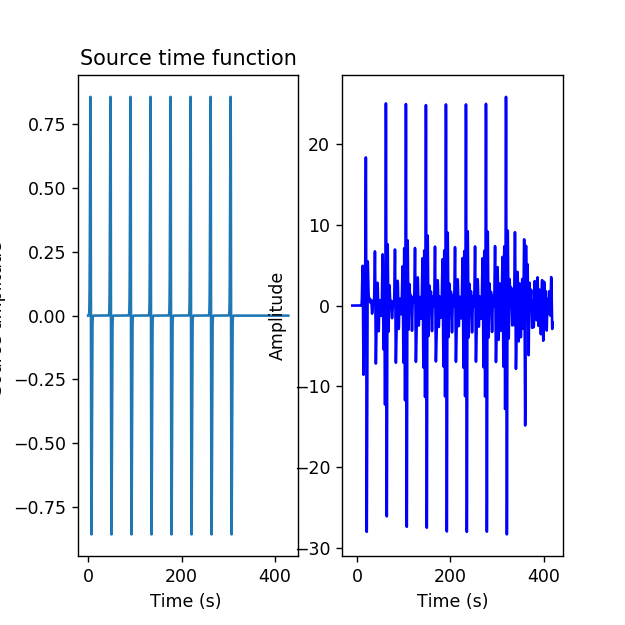

In [96]:
plt.show()

In [185]:
np.shape(seis)

(1, 10000)

In [200]:
from scipy import signal
seis_interp=signal.resample(seis[0],30000)
print(np.shape(seis_interp))

(30000,)


In [201]:
from scipy.io.wavfile import write

In [206]:
write('test.wav',1000,np.int16(seis_interp/np.max(seis_interp)*30000))

In [204]:
np.int16(seis[0]/np.max(seis[0])*30000)

array([    0,     0,     0, ..., -2671, -2542, -2406], dtype=int16)

In [146]:
plt.plot(np.int16(seis_interp/np.max(seis_interp)*30000))

<IPython.core.display.Javascript object>


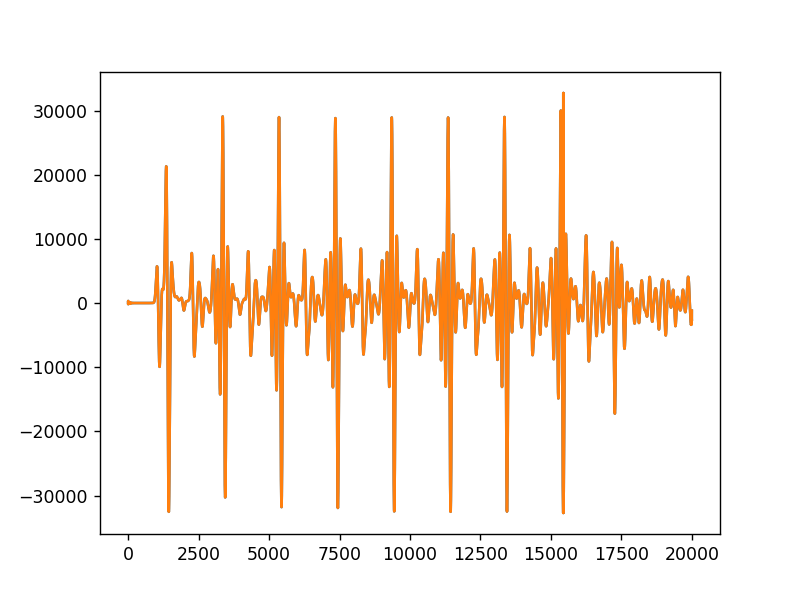

In [147]:
plt.show()